In [2]:
import os
env_vars = !cat .env
for var in env_vars:
    key, value = var.split('=')
    os.environ[key] = value

In [6]:
STABILITY_AI_KEY = os.environ["stability_ai_secret"]

In [10]:
import requests
import json

In [3]:
engine_id = "stable-diffusion-v1-5"
api_host = os.getenv("API_HOST", "https://api.stability.ai")

In [42]:
def generate_image_from_text(prompt=''):
    if prompt == '': return
    if STABILITY_AI_KEY is None:
        raise Exception("Missing Stability API key.")

    response = requests.post(
        f"{api_host}/v1/generation/{engine_id}/text-to-image",
        headers={
            "Content-Type": "application/json",
            "Accept": "application/json",
            "Authorization": f"Bearer {STABILITY_AI_KEY}"
        },
        json={
            "text_prompts": [
                {
                    "text": "Doraemon with many cat with Japanese Anime Style"
                }
            ],
            "cfg_scale": 7,
            "clip_guidance_preset": "FAST_BLUE",
            "height": 512,
            "width": 512,
            "samples": 1,
            "steps": 30,
        },
    )

    if response.status_code != 200:
        raise Exception("Non-200 response: " + str(response.text))

    return response.json()

In [43]:
data = generate_image_from_text(prompt="Doraemon with many cat with Japanese Anime Style")
print(data)

{'artifacts': [{'base64': 'iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAIAAAB7GkOtAAACkGVYSWZNTQAqAAAACAAGAQAABAAAAAEAAAIAAQEABAAAAAEAAAIAAQ4AAgAAADEAAABWARAAAgAAABQAAACIATEAAgAAAA0AAACckhMAAQAAAeUAAACqAAAAAERvcmFlbW9uIHdpdGggbWFueSBjYXQgd2l0aCBKYXBhbmVzZSBBbmltZSBTdHlsZQAAc3RhYmlsaXR5LWRpZmZ1c2lvbgBzdGFiaWxpdHkuYWkAADNrRVM3dnBCNDplTzVOY3d7NWZlei9kZElmIUNsfWNzT11BZ0NAU052TDZyQWk1Sm9BaC1DdDJ2TXV0N2VOQHJIZyt7JDBoLTlpRWl4dyZoMHUjPCQwMio0KjFxN00tMCQyYnc9antWLzVpe045NUFYXU0zaUg8ITFwdGt4LnV7Ukw1d09bPTAkLSYuM2lIPE1jamY/Xi13ZD01NXZxXU8xcTdQOjAkKUtDQi1STlJCOD4renZxe2ZzeT9XdWlCOTcmMXk/bCU6eD55JDFCN11NZ2ZscWV6ZmtVU3JCLj5TZ2ZsemJGd08jamR3UHhvbzBzamhVNXA6KTQxK0xLZ311IXRDYygkYkIyTkFGJjB0ay5HMDA0S2xlRHQhZWtROFAlMk0+WjcwdGtAMDRQV3B5ZUw0REZnK3lwKHovb2UwNSY3MjB4JkRWVGVJUDdsZVBrUHR6RUVrKDdDVi5heCZEVkplSS9kbGVPWzxmei9kc3R1VTdASTlOaC80alQ3angwMDAwLTYtWGs6a29abXUwMDAwLWRIY0heOU5oLzRqI2EoYWZIUCYxdnA6cF16eEtkcUJ6OCFsdnFadWt2eyVFNEN3aGVqYXdjNll2cVlUJHdHVG9SeChkQTdxLylxM3dEaFlnAHvtYQYAAQAASURBVHictP15uG5ZUhaIxxux1t77G858h

In [14]:
from IPython.display import display, HTML
def display_image(data):
    for i, image in enumerate(data["artifacts"]):
       display(HTML(f'<img src="data:image/png;base64,{image["base64"]}" />'))


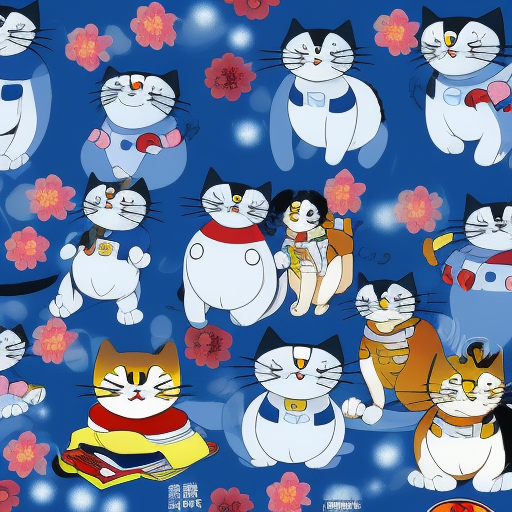

In [45]:
display_image(data)

In [16]:
def generate_image_from_image(prompt=''):
    if prompt == '': return
    if STABILITY_AI_KEY is None:
        raise Exception("Missing Stability API key.")

    response = requests.post(
        f"{api_host}/v1/generation/{engine_id}/image-to-image",
        headers={
            "Accept": "application/json",
            "Authorization": f"Bearer {STABILITY_AI_KEY}"
        },
        files={
            "init_image": open("./profile3.jpg", "rb")
        },
        data={
            "image_strength": 0.35,
            "init_image_mode": "IMAGE_STRENGTH",
            "text_prompts[0][text]": prompt,
            "cfg_scale": 7,
            "clip_guidance_preset": "FAST_BLUE",
            "samples": 1,
            "steps": 30,
        }
    )

    if response.status_code != 200:
        raise Exception("Non-200 response: " + str(response.text))

    return response.json()

In [17]:
data = generate_image_from_image(prompt="Doraemon a blue robot cat")
print(data)

{'artifacts': [{'base64': 'iVBORw0KGgoAAAANSUhEUgAAAYAAAAGACAIAAAArpSLoAABcyGVYSWZNTQAqAAAACAAGAQAABAAAAAEAAAGAAQEABAAAAAEAAAGAAQ4AAgAAABoAAABWARAAAgAAABQAAABwATEAAgAAAA0AAACEkhMAAQAAXDUAAACSAAAAAERvcmFlbW9uIGEgYmx1ZSByb2JvdCBjYXQAc3RhYmlsaXR5LWRpZmZ1c2lvbgBzdGFiaWxpdHkuYWkAADNrRVM3dnBCNDplTzVOY3d7NWZlei9kZElmIUNsfWNvMkJ5d2kxamZmRmJkdmgtMDN4aCFETEtpd1VoOGVJTyQmZ0k1dSRoIWpUS2c9XnJjMHUjcyEwMi9JVDFxN00tMCQyYnc9antWLzVpe045NUFYXU0zaUg8UDBUWTJ2Xkh1Sj01elkuWTAkLWxYM2lRfXVGRERKemZsSXRSZmxxZXpmancqc2ZrTHVpZmxxa3p2Ui9RLnduYlQvQi1Sbm56emM2S3Y+Ulhxd296WjFCMS5TTnlIfXgkRHMuYXYqKElLejBURi9KIXElWHgyUHNUPEFiWVNjdnslRVt6L2RqQXZydTYjQnN9Sk16Ly9dYkIuazhkd05eTWVmPktdSWVJWj17ZiFEKkJmRitwdmYvLjN3d0k9dDR3W3R5ZmheW1pUQS9sMVcyTT5YdzF0eklGRnJmXnRrLmhjP2t5I2E3a3ZNJj1rdik1KWt3MGIoa0JCOmRrei5SI2okbitua2dJPGRrUzdXRWpIZDJOZSN5V0ZpPm1kYWgmWSkkVSE4IzBqaSo2bGtBdiMpa3hdeXFrQlQpYmt2bFNNa3VRaVFreXRXSGtLZ0xvazA4MFJrSXdwM2t1cDBqa3ErVVFrcTJlOmt2Vl1Ia249WEhraUM4ZmtvOEAraUk5VHtqZTFdYlghXnMvZWxVYWpoTXNvSGhneihkVX0hZlpra2woa1Z0e


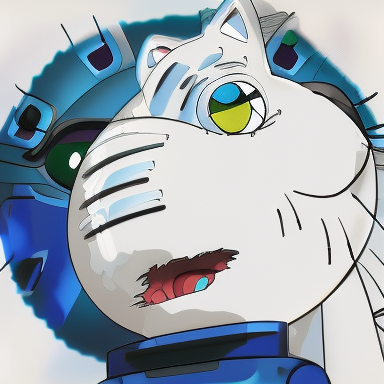

In [18]:
display_image(data)